In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('credit_scoring.csv')

In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
status_values = { 
    1: 'ok', 
    2: 'default', 
    0: 'unk' 
} 
df.status = df.status.map(status_values)

In [5]:
home_values = { 
    1: 'rent', 
    2: 'owner', 
    3: 'private', 
    4: 'ignore', 
    5: 'parents', 
    6: 'other', 
    0: 'unk' 
} 
df.home = df.home.map(home_values) 

In [6]:
marital_values = { 
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated', 
    5: 'divorced', 
    0: 'unk' 
} 
df.marital = df.marital.map(marital_values) 

records_values = { 
    1: 'no', 
    2: 'yes', 
    0: 'unk' 
} 
df.records = df.records.map(records_values) 

job_values = { 
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others', 
    0: 'unk' 
} 
df.job = df.job.map(job_values) 

In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
for c in ['income', 'assets', 'debt']: 
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [10]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [11]:
df = df[df.status != 'unk'] 

In [12]:
from sklearn.model_selection import train_test_split 
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11) 
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11) 

In [13]:
y_train = (df_train.status == 'default').values 
y_val = (df_val.status == 'default').values 
del df_train['status'] 
del df_val['status'] 

In [14]:
df_train = df_train.fillna(0) 
df_val = df_val.fillna(0)

In [15]:
dict_train = df_train.to_dict(orient='records') 
dict_val = df_val.to_dict(orient='records')

In [16]:
from sklearn.feature_extraction import DictVectorizer 
dv = DictVectorizer(sparse=False) 
X_train = dv.fit_transform(dict_train) 
X_val = dv.transform(dict_val) 

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [22]:
from sklearn.metrics import roc_auc_score 
y_pred = dt.predict_proba(X_train)[:, 1] 
print("train",roc_auc_score(y_train, y_pred))
y_pred = dt.predict_proba(X_val)[:, 1] 
print("val",roc_auc_score(y_val, y_pred))

train 0.7054989859726213
val 0.6685264343319367


In [21]:
from sklearn.tree import export_text  
tree_text = export_text(dt, feature_names=dv.feature_names_)  
print(tree_text) 

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



In [23]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]: 
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    y_pred = dt.predict_proba(X_val)[:, 1] 
    auc = roc_auc_score(y_val, y_pred) 
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.758
  10 -> 0.699
  15 -> 0.660
  20 -> 0.653
None -> 0.644


In [24]:
for m in [4, 5, 6]: 
    print('depth: %s' % m) 

    for s in [1, 5, 10, 15, 20, 50, 100, 200]: 
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s) 
        dt.fit(X_train, y_train) 
        y_pred = dt.predict_proba(X_val)[:, 1] 
        auc = roc_auc_score(y_val, y_pred) 
        print('%s -> %.3f' % (s, auc)) 

    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.767
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.762
5 -> 0.762
10 -> 0.778
15 -> 0.785
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768



In [25]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15) 
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [27]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=10,random_state=3) 
rf.fit(X_train, y_train) 
y_pred = rf.predict_proba(X_val)[:, 1] 
roc_auc_score(y_val, y_pred) 

0.7811145285897654

In [28]:
aucs = [] #A 

for i in range(10, 201, 10): #B 
    rf = RandomForestClassifier(n_estimators=i, random_state=3) #B 
    rf.fit(X_train, y_train) #B 

    y_pred = rf.predict_proba(X_val)[:, 1] #C 
    auc = roc_auc_score(y_val, y_pred) #C 
    print('%s -> %.3f' % (i, auc)) #C 

    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


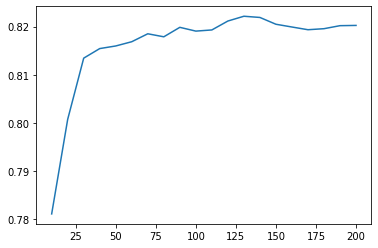

In [29]:
plt.plot(range(10, 201, 10), aucs) 

In [30]:
all_aucs = {} #A 

for depth in [5, 10, 20]: #B 
    print('depth: %s' % depth) 
    aucs = [] #C 

    for i in range(10, 201, 10): #C 
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1) #D 
        rf.fit(X_train, y_train) 
        y_pred = rf.predict_proba(X_val)[:, 1] 
        auc = roc_auc_score(y_val, y_pred) #E 
        print('%s -> %.3f' % (i, auc)) #E 
        aucs.append(auc) #E 

    all_aucs[depth] = aucs #F 
    print()

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



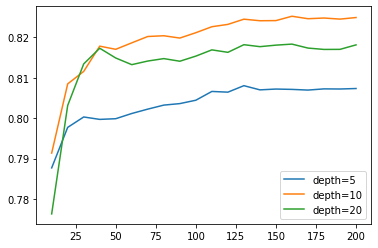

In [31]:
num_trees = list(range(10, 201, 10)) 
plt.plot(num_trees, all_aucs[5], label='depth=5') 
plt.plot(num_trees, all_aucs[10], label='depth=10') 
plt.plot(num_trees, all_aucs[20], label='depth=20') 
plt.legend() 

In [32]:
all_aucs = {} 

for m in [3, 5, 10]: 
    print('min_samples_leaf: %s' % m) 
    aucs = [] 

    for i in range(10, 201, 20): 
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, 
random_state=1) 
        rf.fit(X_train, y_train) 
        y_pred = rf.predict_proba(X_val)[:, 1] 
        auc = roc_auc_score(y_val, y_pred) 
        print('%s -> %.3f' % (i, auc)) 
        aucs.append(auc) 
    
    all_aucs[m] = aucs 
    print() 

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



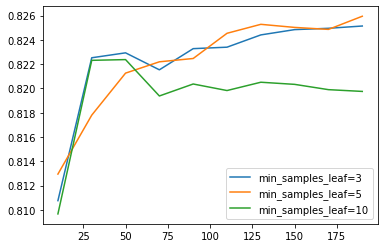

In [33]:
num_trees = list(range(10, 201, 20)) 
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3') 
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10') 
plt.legend() 

In [34]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1) 
rf.fit(X_train, y_train) 
y_pred = rf.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_pred) 
print('%.3f' % (auc)) 

0.825
